# Customer Propensity Modelling

---

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')



In [2]:
from sklearn.model_selection import train_test_split

Loading the data from the training sample

In [3]:
rawdata = pd.read_csv("../data/raw/training_sample.csv")


In [4]:
rawdata.columns


Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

In [5]:
rawdata.drop('UserID', axis='columns',inplace=True)


In [6]:
TARGET = 'ordered'

Make a Train/Test split and remember that we need to stratify respect to the `TARGET` because of the imbalance.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    rawdata.drop(TARGET, axis='columns'),
    rawdata[TARGET],
    test_size=0.2, 
    random_state=42,
    shuffle=True,
    stratify=rawdata[TARGET])


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
RandomForest = RandomForestClassifier(n_estimators=100, random_state=42,verbose=True,class_weight='balanced')


In [11]:
RandomForest.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.0s finished


RandomForestClassifier(class_weight='balanced', random_state=42, verbose=True)

In [12]:
y_predict = RandomForest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [13]:
report = classification_report(y_test, y_predict, output_dict=True)
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87262
           1       0.85      0.98      0.91      3819

    accuracy                           0.99     91081
   macro avg       0.92      0.98      0.95     91081
weighted avg       0.99      0.99      0.99     91081



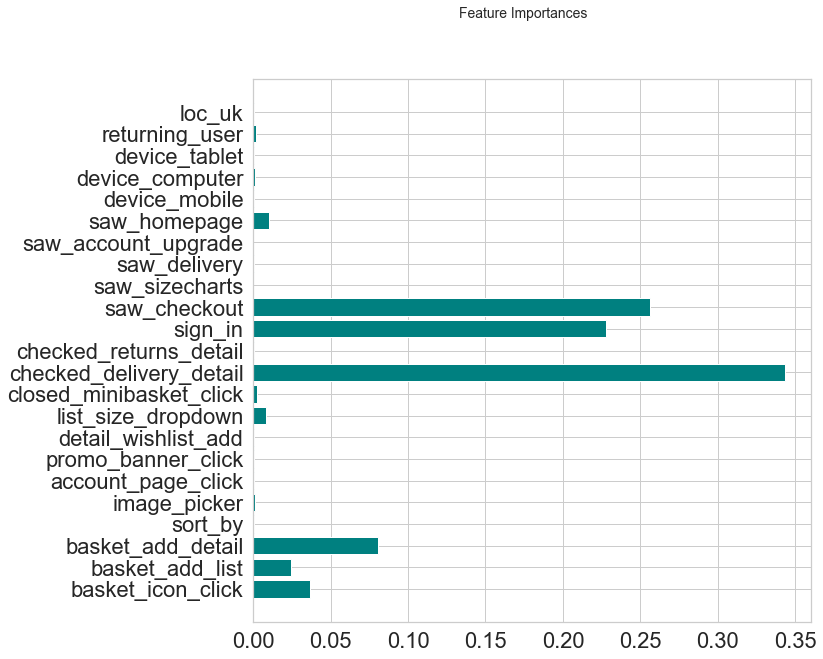

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(X_test.columns,
        RandomForest.feature_importances_,
        color='teal')
fig.suptitle('Feature Importances', size=14)
ax.tick_params(axis='x', labelrotation=0)


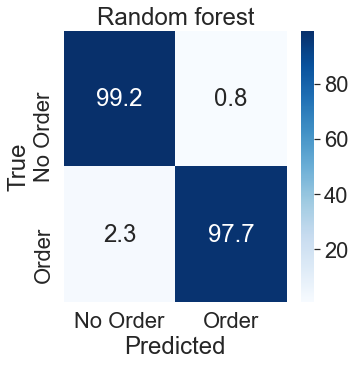

In [15]:
conf_ma = confusion_matrix(y_test, y_predict, normalize='true')
conf_ma = (100*conf_ma).round(1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_ma, annot=True, fmt="1", cmap='Blues', ax=ax)
ax.set(title="Random forest", ylabel="True", xlabel="Predicted",
       xticklabels=('No Order', 'Order'), yticklabels=('No Order', 'Order'));


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.3s finished


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87262
           1       0.85      0.99      0.91      3819

    accuracy                           0.99     91081
   macro avg       0.92      0.99      0.95     91081
weighted avg       0.99      0.99      0.99     91081



[[Text(0, 0.5, 'No Order'), Text(0, 1.5, 'Order')],
 Text(11.5, 0.5, 'True'),
 [Text(0.5, 0, 'No Order'), Text(1.5, 0, 'Order')],
 Text(0.5, 11.5, 'Predicted'),
 Text(0.5, 1.0, 'Logistic Regression')]

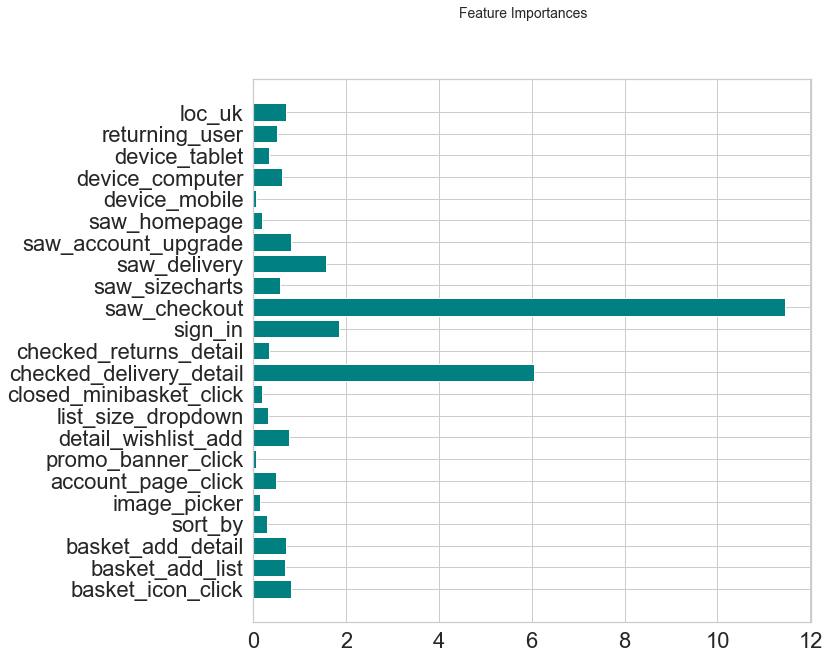

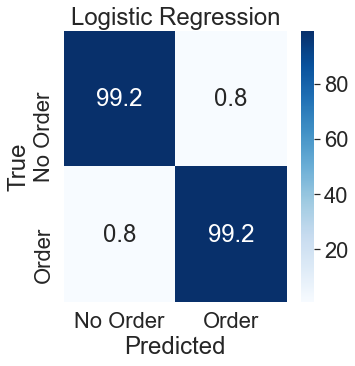

In [30]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(
    random_state=42, verbose=True, class_weight='balanced', penalty='l2', C=1,n_jobs=-1)
Logistic.fit(X_train, y_train)
y_predict = Logistic.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(X_test.columns,
        abs(Logistic.coef_[0]),
        color='teal')
fig.suptitle('Feature Importances', size=14)
ax.tick_params(axis='x', labelrotation=0)

print(classification_report(y_test, y_predict))
conf_ma = confusion_matrix(y_test, y_predict, normalize='true')
conf_ma = (100*conf_ma).round(1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_ma, annot=True, fmt="1", cmap='Blues', ax=ax)
ax.set(title="Logistic Regression", ylabel="True", xlabel="Predicted",
       xticklabels=('No Order', 'Order'), yticklabels=('No Order', 'Order'))


/home/pdona/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:13] WARNING: ../src/learner.cc:573: 
Parameters: { "jobs", "random_seed" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.99719
[1]	validation_0-auc:0.99720
[2]	validation_0-auc:0.99720
[3]	validation_0-auc:0.99731
[4]	validation_0-auc:0.99731
[5]	validation_0-auc:0.99731
[6]	validation_0-auc:0.99731
[7]	validation_0-auc:0.99731
[8]	validation_0-auc:0.99731
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87262
           1       0.87      0.98      0.92      3819

    accuracy                           0.99     91081
   macro avg       0.93      0.99      0.96     91081
weighted avg       0.99      0.99      0.99     91081



[[Text(0, 0.5, 'No Order'), Text(0, 1.5, 'Order')],
 Text(11.5, 0.5, 'True'),
 [Text(0.5, 0, 'No Order'), Text(1.5, 0, 'Order')],
 Text(0.5, 11.5, 'Predicted'),
 Text(0.5, 1.0, 'XGB Classifier')]

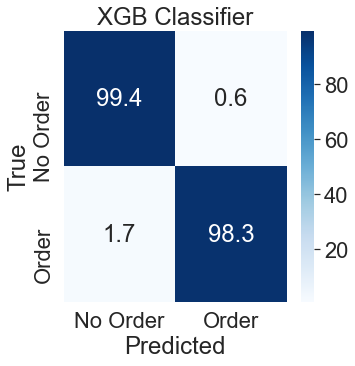

In [23]:
from xgboost import XGBClassifier

xgbClass = XGBClassifier(n_estimators=1000, random_seed=42, max_depth=6, learning_rate=0.01,jobs=4)
xgbClass.fit(X_train, y_train, early_stopping_rounds=5,
             eval_metric="auc", eval_set=[(X_train, y_train)], verbose=True)
y_predict = xgbClass.predict(X_test)
print(classification_report(y_test, y_predict))
conf_ma = confusion_matrix(y_test, y_predict, normalize='true')
conf_ma = (100*conf_ma).round(1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_ma, annot=True, fmt="1", cmap='Blues', ax=ax)
ax.set(title="XGB Classifier", ylabel="True", xlabel="Predicted",
       xticklabels=('No Order', 'Order'), yticklabels=('No Order', 'Order'))


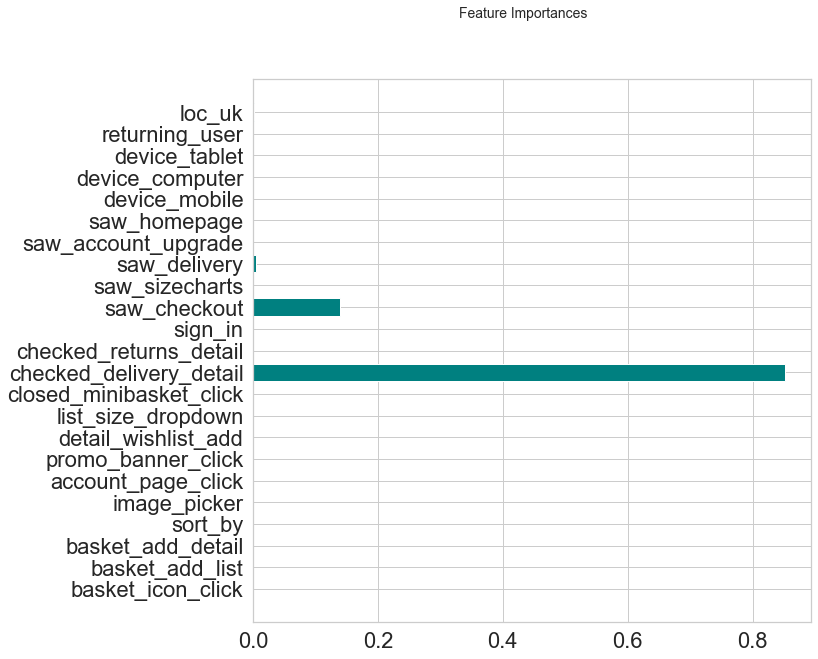

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(X_test.columns,
        xgbClass.feature_importances_,
        color='teal')
fig.suptitle('Feature Importances', size=14)
ax.tick_params(axis='x', labelrotation=0)
